# Zoll Patient Monitor
## JSON Data Processing

Simo Mäkelä  
Helsinki Metropolia University of Applied Sciences  
25.6.2020

In [113]:
import json
import pandas as pd
import numpy as np

In [114]:
datafile = "data/AR12E000937-20200525-104652-779.json"

In [115]:
data = {}
with open(datafile, "r") as fd:
    data = json.load(fd)

In [116]:
zoll_record = data['ZOLL']['FullDisclosure'][0]['FullDisclosureRecord']

In [117]:
record_types = {}
n_items = 0

for item in zoll_record:
    n_items = n_items + 1
    for key in item:
        if key in record_types:
            record_types[key] = record_types[key] + 1
        else:
            record_types[key] = 1

print("FullDisclosureRecord contains", n_items, "items:\n")
for key, value in record_types.items():
    print("{: >20} {: >6}".format(key, value))

FullDisclosureRecord contains 17543 items:

             NewCase      2
       AnnotationEvt   1284
            TrendRpt    347
 DeviceConfiguration      1
        DataChannels      1
         PatientInfo      1
         AlarmLimits      1
        TraceConfigs      8
                 Aed      7
         DisplayInfo      3
       ContinWaveRec   2884
    InstrumentPacket     48
   AedContinAnalysis   2500
         SysLogEntry    446
     SelfTestFailure      8
          DefibTrace   8875
            PrtTrace   1125
         CaseSummary      2


In [118]:
wave_records = [] # contains objects of type ContinWaveRec
trend_reports = [] # contains objects of type TrendRpt

for item in zoll_record:
    for key in item:
        if key == "ContinWaveRec":
            wave_records.append(item['ContinWaveRec'])
        if key == "TrendRpt":
            trend_reports.append(item['TrendRpt'])

print(len(wave_records), "ContinWaveRec items found.")
print(len(trend_reports), "TrendRpt items found.")
# json.dumps(trend_reports[200])


2884 ContinWaveRec items found.
347 TrendRpt items found.


In [119]:
etco2 = []
nibp_s = []
nibp_m = []
nibp_d = []
spo2 = []
pulse = []
timestamps = []
for report in trend_reports:
    etco2.append(report['Trend']['Etco2']['TrendData']['Val']['#text'])
    nibp_s.append(report['Trend']['Nibp']['Sys']['TrendData']['Val']['#text'])
    nibp_m.append(report['Trend']['Nibp']['Map']['TrendData']['Val']['#text'])
    nibp_d.append(report['Trend']['Nibp']['Dia']['TrendData']['Val']['#text'])
    spo2.append(report['Trend']['Spo2']['TrendData']['Val']['#text'])
    pulse.append(report['Trend']['Hr']['TrendData']['Val']['#text'])
    timestamps.append(pd.to_datetime(report['StdHdr']['DevDateTime']))
# print(etco2)
# print(timestamps)

In [120]:
df = pd.DataFrame(etco2, columns=['EtCO2'])
df['MAP'] = nibp_m
df['SAP'] = nibp_s
df['DAP'] = nibp_d
df['P'] = pulse
df['SpO2'] = spo2
df.index = timestamps
df = df.replace({
    "EtCO2":-7216,
    "MAP":14368,
    "SAP":24608,
    "DAP":-8061,
    "P":-2332,
    "SpO2":-32768}, np.nan)
#df

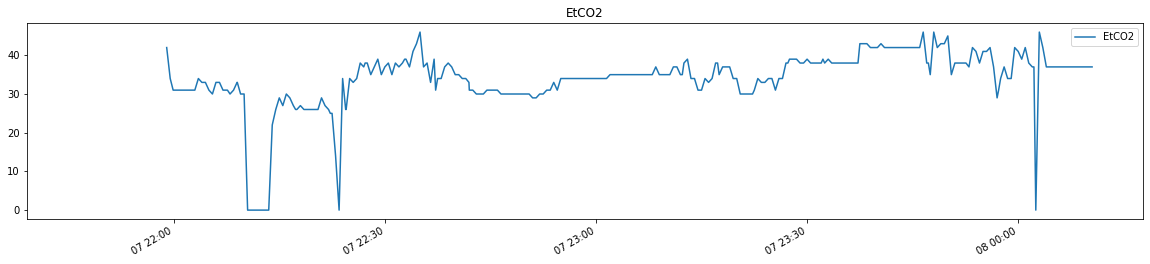

In [121]:
df[['EtCO2']].plot(figsize=(20,4), title="EtCO2")

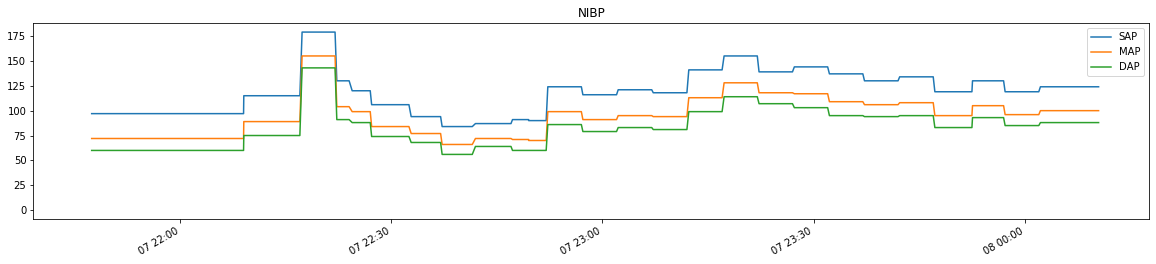

In [122]:
df[['SAP', 'MAP', 'DAP']].plot(figsize=(20,4), title="NIBP")

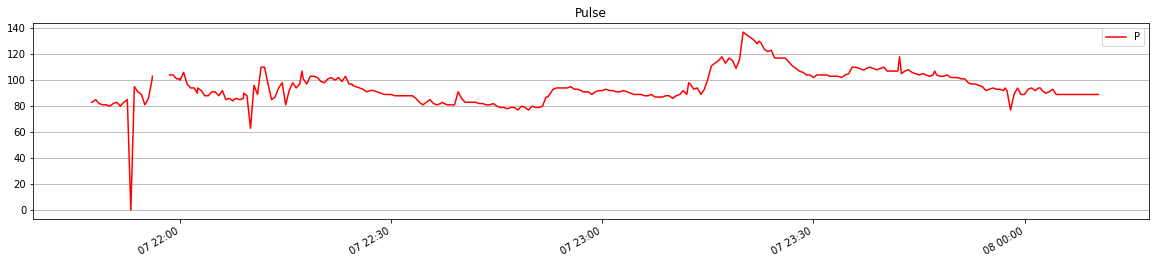

In [123]:
df[['P']].plot(figsize=(20,4), title="Pulse", color='red').grid(axis='y')

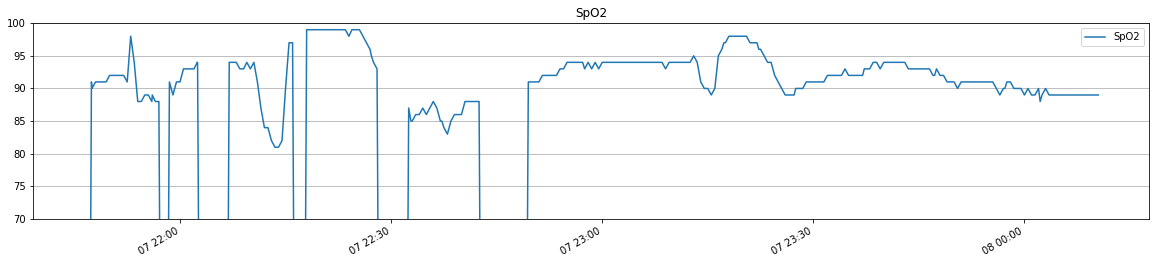

In [124]:
df[['SpO2']].plot(figsize=(20,4), ylim=(70,100), title="SpO2").grid(axis='y')